# Advanced Business Analytics (CIS442D)

## Homework Assignment 2
### Due date: 1/17/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# (1) json and web-services
In this exercise, you will use the open database <a>opencorporates.com</a> to create a DataFrame holding information about companies. Search the words "mckinsey company" and  based on the results, create a DataFrame that contains companies numbers, companies names, country and localty using the corresponding attributes from the database API (see the inclass example).

In [218]:
# write solution here
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

page = requests.get('https://api.opencorporates.com/v0.4/companies/search?q=mckinsey')
data = json.loads(page.text)
type(data)
df = json_normalize(data['results']['companies'])
df = df[['company.company_number','company.name','company.registered_address.country','company.registered_address.locality']]
df   


,company.company_number,company.name,company.registered_address.country,company.registered_address.locality
0,22138811,"""MCKINSEY & COMPANY SRL""",Romania,"""Bucureşti Sectorul 1"""
1,34790710,"""MCKINSEY FACILITY SRL""",Romania,None
2,0000338127,"""MCKINSEY KNOWLEDGE CENTER POLAND"" SPÓŁKA Z OG...",NaN,NaN
3,14366975,"""McKINSEY FINANCIAL CONSULTING SRL""",Romania,"""Bucureşti Sectorul 3"""
4,516402-1072,"""McKinsey & Company, Inc. Sweden (USA) svensk ...",NaN,NaN
5,0636808067,"'McKinsey Solutions Holdings, Inc.",Etats-Unis d'Amérique,"Wilmington, Delaware"
6,08271775,08271775 LTD,England,London
7,W15386345,106 MCKINSEY PARK DRIVE LLC,United States,None
8,4357893,"6002 MCKINSEY, LLC",NaN,NaN
9,02976743,AARON ANDERSON & MCKINSEY LIMITED,United Kingdom,Chessington


# (2) Databases and sql
The file "pageviews" contains a table with 4 columns.
1. Load the data file into a table in the empty database "empty_db.sqlite".
2. Write and execute a sql query that computes the sum of the third column of the newly created table.

In [124]:
# write solution here
import sqlite3
import csv
!ls
!cp "empty_db.sqlite" "db.sqlite" 

file = open('pageviews')
df = pd.read_csv("pageviews", sep=" ", names=["Project","Title","Pageviews","x"],encoding='utf8')
df.to_csv('data_out.csv',index=False)
file.close
!head -5 "data_out.csv"

con = sqlite3.connect('db.sqlite')

csvfile = open('data_out.csv')
csvReader = csv.reader(csvfile)
header = next(csvReader) # skip first row (header)

con.execute("DROP TABLE tbl")
con.commit()

con.execute("CREATE TABLE tbl(Project TEXT, Title TEXT, Pageviews INTEGER, x INTEGER);")
con.commit()

for rec in csvReader: # iterate over the other rows
    con.execute("INSERT INTO tbl VALUES %s"%str(tuple(rec)))  
csvfile.close()    
con.commit() 
con.close()



con = sqlite3.connect('db.sqlite')
df = pd.read_sql_query("""SELECT sum(Pageviews) 
                            FROM tbl 
                           """, con)
con.close()
df.head()


#for rec in csvReader: # iterate over the other rows
 #   con.execute("INSERT INTO tbl VALUES %s"%str(tuple(rec)))  
#csvfile.close()    
#con.commit() 
#con.close()
#df=pd.read_sql_query("SELECT * from sqlite_master", con)


data_out.csv      empty_db.sqlite   html_example.txt  mckinsey.txt
db.sqlite         homework2.ipynb   html_example2.txt pageviews
Project,Title,Pageviews,x
aa,Main_Page,1,0
aa.d,Main_Page,1,0
aa.m,Main_Page,1,0
ab,1942,1,0


,sum(Pageviews)
0,233058


# (3) Web-scraping

HTML are XML documents that specify the content and design of web-pages. For example, the file html_example.txt contains the HTML representation of the following table: 

| A | B | C |
|---|---|---|
| D | E | F |


In [7]:
!cat html_example.txt

<TABLE>
    <TR>
        <TD>A</TD>
        <TD>B</TD>
        <TD>C</TD>
    </TR>
    <TR>
        <TD>D</TD>
        <TD>E</TD>
        <TD>F</TD>
    </TR>
</TABLE>


The TABLE element is used to indicate the beginning of the table, TR elements indicate beginning of rows, and TD elements indicate beginning of columns. The text that appears between the TD tags specifies cells content. 

As another example, hyperlinks are specified using the A tag. That is, for a link to the website "http://www.w3schools.com" whose label in a webpage is "Visit W3Schools.com", there is a corresponding A element (that is, an element whose tag is A). The file html_example2.txt contains the HTML specification for this link:

In [8]:
!cat html_example2.txt

<a href="http://www.w3schools.com">Visit W3Schools.com!</a> 


Pick a Wikipedia article of your choice. 
1. Print all hyperlinks appearing your article (links to other websites or wikipedia pages)
2. Print a list with Wikipedia articles referenced from your chosen article
3. Choose a webpage (not necessarily in Wikipedia) that contains tabular information. Write code that reads the webpage and creates a DataFrame, which contains that table.

In [3]:
# write solution here
from lxml import html
from lxml import etree
import requests
import pandas as pd
import lxml.html

page = requests.get('https://en.wikipedia.org/wiki/League_of_Legends')
tree = html.fromstring(page.content)

links = tree.xpath('//a/@href')

for i in links:
    print(i)
    
    

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/BetFred_League_of_Legends
/wiki/Lol_(disambiguation)
/wiki/File:League_of_Legends_logo.png
/wiki/Video_game_developer
/wiki/Riot_Games
/wiki/Video_game_publisher
/wiki/Video_game_producer
/wiki/Video_game_designer
/wiki/Steve_Feak
/wiki/Game_artist
/wiki/George_Krstic
/wiki/Video_game_music
/wiki/Computing_platform
/wiki/Microsoft_Windows
/wiki/MacOS
/wiki/Video_game_genre
/wiki/Multiplayer_online_battle_arena
/wiki/Multiplayer_video_game
/wiki/Multiplayer_online_battle_arena
/wiki/Riot_Games
/wiki/Microsoft_Windows
/wiki/MacOS
/wiki/Freemium
/wiki/Microtransaction
/wiki/Warcraft_III:_The_Frozen_Throne
/wiki/Mod_(video_gaming)
/wiki/Defense_of_the_Ancients
#cite_note-1up-dotagenre-1
#cite_note-newplayerguide-2
#cite_note-forbes-3
#cite_note-wsj-4
#cite_note-5
#cite_note-6
/wiki/League_of_Legends_Championship_Series
/wiki/Los_Angeles
/wiki/Berlin
#cite_note-7
/wiki/China
/wiki/South_Korea
/wiki/Taiwan
#cite_note-8
/wiki/Sou

In [6]:
ref = tree.xpath("//a[@class='external text']")


for i in ref:
    ref1 = etree.tostring(i)
    print(ref1)
    print('\n')


b'<a rel="nofollow" class="external text" href="http://www.1up.com/do/feature?cId=3175835">"Clash of The DOTAs"</a>. '


b'<a rel="nofollow" class="external text" href="http://gameinfo.na.leagueoflegends.com/en/game-info/get-started/new-player-guide/">"New Player Guide"</a>. '


b'<a rel="nofollow" class="external text" href="http://www.forbes.com/sites/johngaudiosi/2012/07/11/riot-games-league-of-legends-officially-becomes-most-played-pc-game-in-the-world/">"Riot Games\' League Of Legends Officially Becomes Most Played PC Game In The World"</a>. '


b'<a rel="nofollow" class="external text" href="http://blogs.wsj.com/digits/2014/01/27/player-tally-for-league-of-legends-surges/">"Player Tally for \'League of Legends\' Surges"</a>. Wsj.com'


b'<a rel="nofollow" class="external text" href="http://na.lolesports.com/articles/2015-season-10-teams-expansion-tournament-circuit-points">"2015 SEASON: 10 Teams, Expansion Tournament &amp; Circuit Points"</a>.'


b'<a rel="nofollow" class="extern

In [381]:

page = requests.get('https://en.wikipedia.org/wiki/League_of_Legends')
tree = html.fromstring(page.content)
tables = tree.xpath('.//table')
population_table = tables[4]

rows_parsed = []
for row_elements in population_table:
    row = []
    for col_elements in row_elements:
        row.append(col_elements.text_content())
    rows_parsed.append(row)
    
pd.DataFrame(rows_parsed[1:], columns=rows_parsed[0])

,Date,Awards,Category,Result
0,"December 14, 2009",IGN PC Best Strategy Game 2009,Readers' Choice,Winner[89]
1,"December 21, 2009",GameSpy Gamers' Choice Awards 2009,PC Gamers' Choice,Winner[90]
2,"October 8, 2010",1st Game Developers Online Choice Awards,"Best Online Technology, Visual Arts, Game Desi...",Winner[91]
3,"October 29, 2010",Golden Joystick Award,Online Game of the Year,Winner[92]
4,"October 21, 2011",Golden Joystick Award,Best Free-to-Play Game,Winner[93]
5,"December 3, 2015",The Game Award,eSports Game of the Year Award,Nominated[94]


# (4) numpy, pandas, and Visualization
pandas provides a simple interface for downloading data from various online sources such as Google finance, the World Bank, and the OECD (see for example <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance">Yahoo! Finance</a>). 
The code below shows an example for extracting data on Google and IBM stocks. 

Pick 5 stocks of your choice.
1. Create a dataframe holding the closing price for each stock in the last year.
2. By how much (in percents) did the price of each stock vary over the last year? Draw a barplot, in which the x-axis represents stocks, and the y-axis represents the change in percents.
3. Generate a random array of 5 integers between 10-100 that represent the number of stocks in your protfolio. 
   1. Draw a pie chart representing the composition of your protfolio at the beginning of year (in US$). 
   2. Plot the daily value of your protfolio over the last year.
4. Plot a scatter matrix to check for correlations in the daily changes of stock prices.

In [8]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016, 9, 1)
end = datetime.datetime(2016, 9, 27)
symbols = ["IBM"]
f = web.DataReader(symbols, 'yahoo', start, end)

df_ibm = f.minor_xs('IBM')
df_ibm.head()

ImportError: No module named 'pandas_datareader'

In [9]:
# write solution here
from pandas import Series, DataFrame

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)
symbols = ["SBUX","OAK","RCL","NKE","EV"]
f = web.DataReader(symbols, 'yahoo', start, end)

sbux = f.minor_xs('SBUX')['Close']
oak = f.minor_xs('OAK')['Close']
rcl = f.minor_xs('RCL')['Close']
nke = f.minor_xs('NKE')['Close']
ev = f.minor_xs('EV')['Close']

df = pd.DataFrame(data=dict(SBUX = sbux, OAK=oak, RCL = rcl, NKE = nke, EV = ev), index=sbux.index)
df.head()


NameError: name 'datetime' is not defined

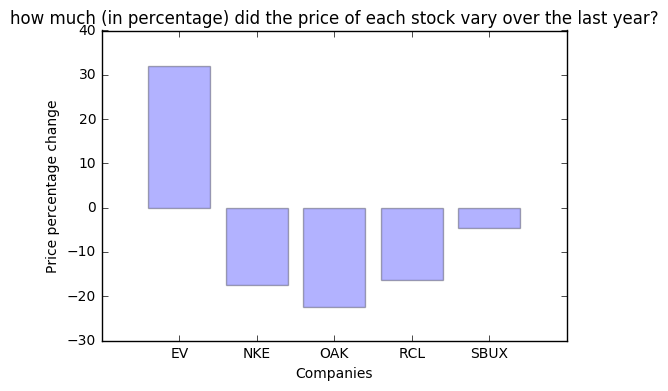

In [125]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

columns = df.columns
price_change = (df.iloc[-1]-df.iloc[0])/df.iloc[0]*100

plt.bar(range(len(columns)), price_change, align='center', alpha=0.3)
plt.xticks(range(len(df.columns)), df.columns)
plt.ylabel('Price percentage change')
plt.xlabel('Companies')
plt.title('how much (in percentage) did the price of each stock vary over the last year?')





[26 35 22 15 93]


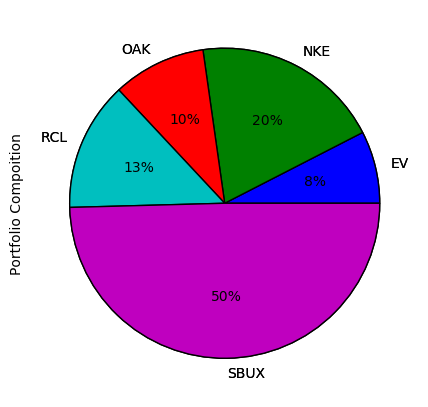

In [196]:
x = np.random.randint(10, 100, 5)
print(x)

price_begin = df.iloc[0]
composition = price_begin*x
composition

composition.plot.pie()
composition.plot.pie(figsize=(5,5),autopct='%.0f%%',label = 'Portfolio Compoition')



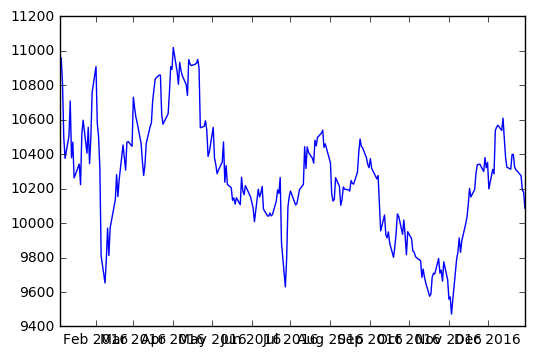

In [203]:
df_value = df*x
portfolio_value = df_value.sum(axis = 1)
plt.plot(portfolio_value)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124dda518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123215eb8>]], dtype=object)

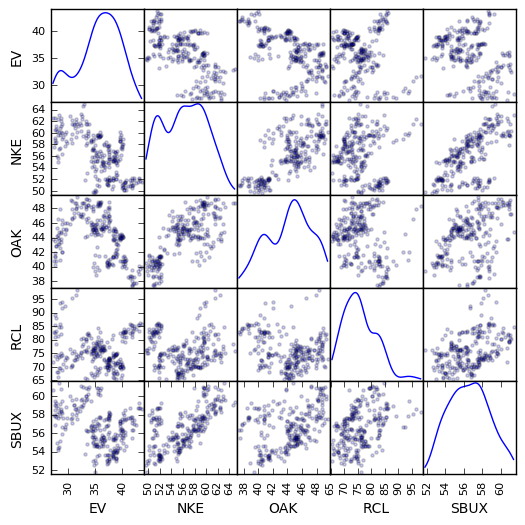

In [123]:
from pandas.tools.plotting import scatter_matrix
x = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
x